# GSEF descriptive anlaysis

In [1]:
import timeit
start_time = timeit.default_timer()

## Import libraries

In [2]:
## Import libraries
import time
import datetime
import pandas as pd
import io
import matplotlib.pyplot as plt

## Read data and reorder columns

In [3]:
gsef= pd.read_csv('gsef_output/historical_gsef.csv', parse_dates=['Date'], dayfirst=True)
gsef['day_of_week'] = pd.to_datetime(gsef['Date']).dt.day_name()

cols = gsef.columns.tolist()

cols = cols[:1] + cols[3:4] + cols[1:3]

gsef = gsef[cols]

### Group and order data by day of week

In [4]:
week_day= gsef.groupby(['day_of_week']).mean()
week_day = week_day.reset_index(level=0)

day_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
week_day['day_of_week'] = pd.Categorical(week_day['day_of_week'], categories=day_of_week_order, ordered=True)
week_day = week_day.sort_values('day_of_week').reset_index(drop=True)
week_day.set_index('day_of_week', inplace=True)

In [6]:
week_day

,Close,pct_change
day_of_week,,
Monday,234.704804,-0.029150
Tuesday,238.683508,0.071941
Wednesday,238.854625,0.034250
Thursday,238.818725,0.020995
Friday,238.322091,-0.001838


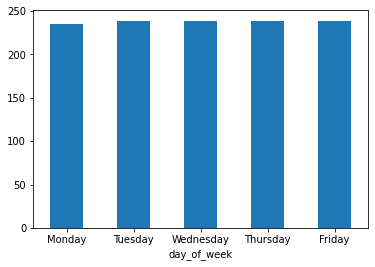

In [5]:
ax = week_day['Close'].plot.bar(rot=0)